<a href="https://colab.research.google.com/github/AbhinavKumar0000/Machine_learning_practice/blob/main/Data_Agumentation_toprevent_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset - https://www.tensorflow.org/tutorials/images/classification

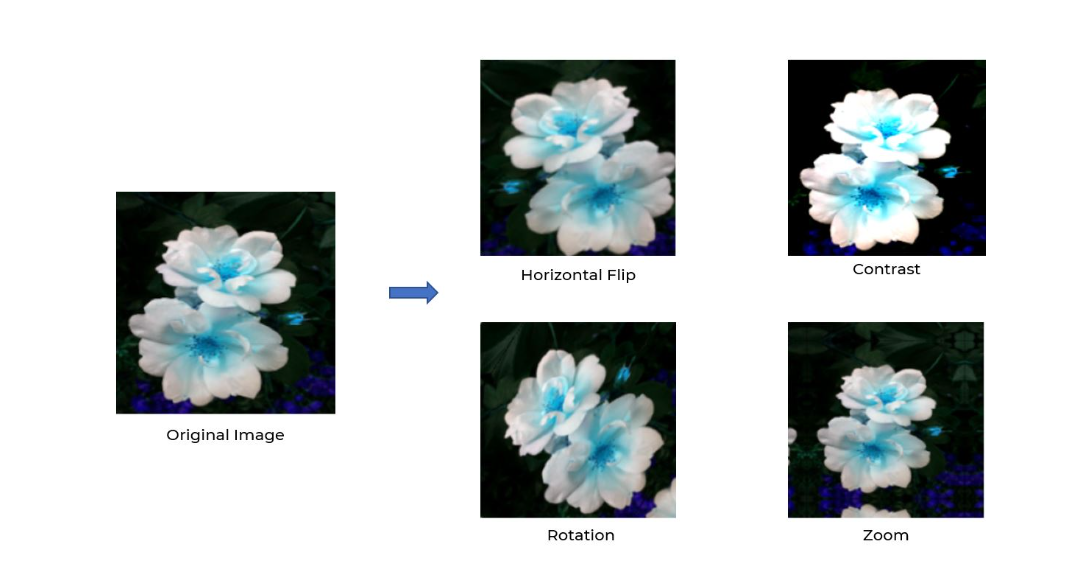

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('**/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/10555826524_423eb8bf71_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/43474673_7bb4465a86.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8681746439_d6beeefbf9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2646438199_b309cffd65_n.jpg')]

In [8]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

3670


In [9]:
data_dir = data_dir / 'flower_photos'

In [10]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

3670


In [11]:
roses = list(data_dir.glob('roses/*.jpg'))
print(roses[:5])

[PosixPath('datasets/flower_photos/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/4648680921_80dfc4f12a.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/roses/15965652160_de91389965_m.jpg')]


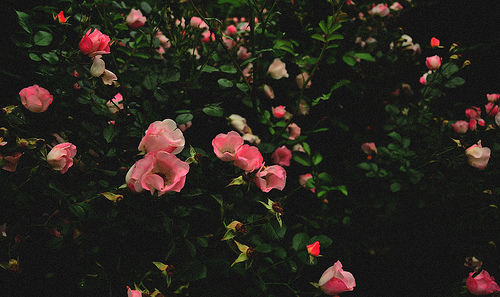

In [12]:
PIL.Image.open(str(roses[1]))

In [13]:
dandelion = list(data_dir.glob('dandelion/*.jpg'))
print(dandelion[:5])

[PosixPath('datasets/flower_photos/flower_photos/dandelion/5605093210_5fecb71c61.jpg'), PosixPath('datasets/flower_photos/flower_photos/dandelion/19440910519_cb1162470e.jpg'), PosixPath('datasets/flower_photos/flower_photos/dandelion/18342918441_b1bb69a2fd_n.jpg'), PosixPath('datasets/flower_photos/flower_photos/dandelion/2693136371_dde2570813.jpg'), PosixPath('datasets/flower_photos/flower_photos/dandelion/17388674711_6dca8a2e8b_n.jpg')]


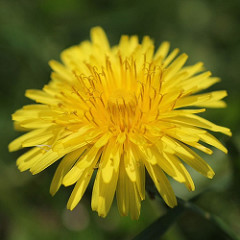

In [14]:
PIL.Image.open(str(dandelion[44]))

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [18]:
img.shape

(240, 320, 3)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X[:3]

[array([[[1, 2, 3],
         [1, 3, 4],
         [0, 2, 3],
         ...,
         [7, 2, 4],
         [7, 2, 3],
         [6, 2, 1]],
 
        [[4, 2, 4],
         [5, 3, 5],
         [4, 2, 4],
         ...,
         [7, 2, 4],
         [7, 2, 3],
         [7, 2, 3]],
 
        [[4, 1, 3],
         [6, 3, 5],
         [5, 2, 4],
         ...,
         [5, 0, 1],
         [5, 0, 1],
         [5, 0, 1]],
 
        ...,
 
        [[5, 1, 2],
         [4, 2, 2],
         [1, 1, 1],
         ...,
         [4, 1, 3],
         [5, 2, 4],
         [5, 2, 4]],
 
        [[4, 0, 2],
         [4, 2, 3],
         [2, 2, 3],
         ...,
         [4, 1, 3],
         [4, 1, 3],
         [4, 2, 4]],
 
        [[4, 0, 4],
         [4, 1, 3],
         [3, 2, 4],
         ...,
         [4, 1, 3],
         [4, 1, 3],
         [2, 1, 3]]], dtype=uint8),
 array([[[20, 20, 20],
         [21, 21, 21],
         [21, 23, 22],
         ...,
         [20, 20, 20],
         [21, 21, 21],
         [18, 18, 18]

In [22]:
y[:3]

[0, 0, 0]

In [21]:
X = np.array(X)
y = np.array(y)

train,test split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data scaling

In [23]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

CNN network


In [27]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 983ms/step - accuracy: 0.2657 - loss: 1.6657
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 949ms/step - accuracy: 0.5736 - loss: 1.0985
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 945ms/step - accuracy: 0.6843 - loss: 0.8077
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 967ms/step - accuracy: 0.7943 - loss: 0.5979
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 940ms/step - accuracy: 0.8711 - loss: 0.3729
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 998ms/step - accuracy: 0.9157 - loss: 0.2483
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 936ms/step - accuracy: 0.9533 - loss: 0.1598
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 936ms/step - accuracy: 0.9728 - loss: 0.1096
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 960ms/step - accuracy: 0.9886 - loss: 0.0509
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 947ms/step - accuracy: 0.9931 - loss: 0.0238


We can see that the accuracy of model on traiing data set is very much high but on test set it is very low it is due to overfitting to prevent that we will perform data agumentaion putting extra sample of data as rotated, zoome and contrast change image set


In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.6065 - loss: 2.6140


[2.536602258682251, 0.6154683828353882]

image flip

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,3))
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


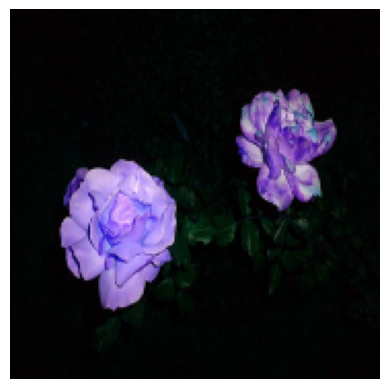

In [25]:
plt.axis('off')
plt.imshow(X[0])

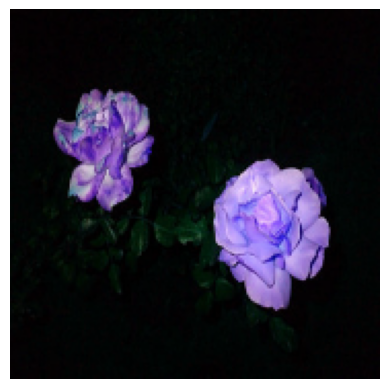

In [26]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

random image roation

In [27]:
data_augmentation1 = keras.Sequential(
  [
    layers.RandomRotation(0.1)
  ]
)

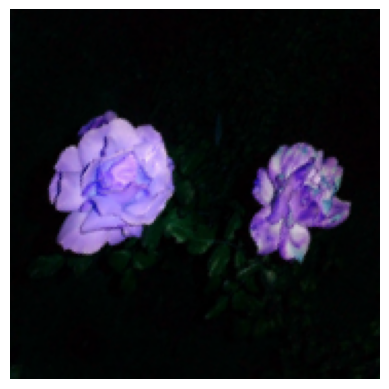

In [28]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype("uint8"))

random image zoom

In [30]:
data_augmentation2 = keras.Sequential(
  [
    layers.RandomZoom(0.1)
  ]
)

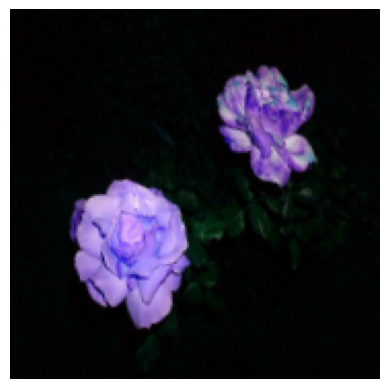

In [32]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype("uint8"))

In [35]:
data_augmentation_all = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
num_classes = 5

model = Sequential([
  data_augmentation_all,                                       #agumentation layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),                                    #dropout layer
  layers.Flatten(),                                       #added faltten layer coxz ann takes flatten layer and output is 2d array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3600 - loss: 1.4278
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.5506 - loss: 1.1023
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6255 - loss: 0.9393
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.6582 - loss: 0.8721
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6831 - loss: 0.8217
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7070 - loss: 0.7484
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7172 - loss: 0.7390
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7343 - loss: 0.6882
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7285 - loss: 0.6825
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7614 - loss: 0.6125


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 410ms/step - accuracy: 0.6603 - loss: 0.9452


[0.8977575898170471, 0.657952070236206]